**Version A: Intermediate ML**




Author: Muhanned Shaheen

**Housing**
- The Problem
A house-flipping company would like to identify underpriced homes by comparing asking prices to predicted sale prices. They would like to segment homes into groups to analyze what kinds of homes there are. They would also like a model that predicts the selling price of a home.

# **Part 1: Clustering Instructions**:


## **Importing And Loading Data**

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import set_config
set_config(transform_output='pandas')
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from tensorflow.keras import Sequential
from tensorflow.keras import metrics
from tensorflow.keras.layers import Dense, Dropout

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import silhouette_score
from imblearn.over_sampling import SMOTE
pd.set_option('display.max_columns', None)


# import tensorflow as tf
from tensorflow.keras import models, layers, regularizers
from keras.layers import Dense, PReLU
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
fpath='/content/drive/MyDrive/StudentFolders16wk24wk/CodingDojo/05-IntermediateML/Week20/Data/option_A_clustering_df - option_A_clustering_df.csv'
df=pd.read_csv(fpath)
df.head()

,SalePrice,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,DaylightBasement,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,BrickStone,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,Longitude,Latitude
0,400000,1590,0,0,0,3180,1590,1590,0,600,1,50,0,220,0,6,0,2,1,1965,-122.196399,47.336118
1,474250,1390,0,0,0,2200,810,810,0,0,1,0,0,340,0,4,1,0,1,1945,-122.361913,47.509874
2,667950,1010,0,1515,0,2525,0,0,0,400,0,167,0,0,0,4,1,0,2,2019,-122.156684,47.437557
3,659000,660,0,540,0,1820,620,620,0,0,1,0,0,100,0,3,1,0,2,2016,-122.370252,47.565146
4,656500,2310,0,0,0,2310,0,0,0,440,0,40,0,320,0,3,0,0,2,1967,-122.184194,47.730389


## **Exploring and cleaning the data**

In [ ]:
print(df.info())
print('\n')
print(f'- Number Of Null values is : {df.isna().sum().sum()}')
print(f'- Number Of Dublicated Values: {df.duplicated().sum()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4944 entries, 0 to 4943
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SalePrice           4944 non-null   int64  
 1   SqFt1stFloor        4944 non-null   int64  
 2   SqFtHalfFloor       4944 non-null   int64  
 3   SqFt2ndFloor        4944 non-null   int64  
 4   SqFtUpperFloor      4944 non-null   int64  
 5   SqFtTotLiving       4944 non-null   int64  
 6   SqFtTotBasement     4944 non-null   int64  
 7   SqFtFinBasement     4944 non-null   int64  
 8   SqFtGarageBasement  4944 non-null   int64  
 9   SqFtGarageAttached  4944 non-null   int64  
 10  DaylightBasement    4944 non-null   int64  
 11  SqFtOpenPorch       4944 non-null   int64  
 12  SqFtEnclosedPorch   4944 non-null   int64  
 13  SqFtDeck            4944 non-null   int64  
 14  BrickStone          4944 non-null   int64  
 15  Bedrooms            4944 non-null   int64  
 16  BathHa


**Data set Shape**
  - **Rows:** 4944
  - **Columns:** 22



**Data Types**
  - All Feachers are numircal data types:
    - Integar: 20 Feacher
    - Float: 2 Feacher


**Data Cleaning**
- We Have 29 Dublicated Values.
Dublicated values will be handled throw droping them.

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
print(f'Number Of dublicated Values Are: {df.duplicated().sum()}')

Number Of dublicated Values Are: 0


### Checking impossible values in numeric data types

In [ ]:
df.describe().round(2)

,SalePrice,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,DaylightBasement,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,BrickStone,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,Longitude,Latitude
count,4915.00,4915.00,4915.00,4915.00,4915.00,4915.00,4915.00,4915.00,4915.00,4915.00,4915.00,4915.0,4915.00,4915.00,4915.00,4915.00,4915.00,4915.00,4915.00,4915.00,4915.00,4915.00
mean,664544.37,1179.08,51.96,347.44,26.52,1937.45,596.63,334.98,102.33,170.88,0.37,55.4,8.24,148.61,4.44,3.38,0.39,0.63,1.32,1971.92,-122.27,47.57
std,298577.38,444.93,174.81,544.87,114.67,765.66,567.98,423.70,187.33,239.93,0.48,96.0,37.50,201.62,18.70,0.95,0.51,0.65,0.61,32.82,0.09,0.13
min,60000.00,260.00,0.00,0.00,0.00,300.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1900.00,-122.53,47.21
25%,450000.00,880.00,0.00,0.00,0.00,1390.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,3.00,0.00,0.00,1.00,1952.00,-122.35,47.49
50%,630000.00,1170.00,0.00,0.00,0.00,1770.00,560.00,110.00,0.00,0.00,0.00,0.0,0.00,50.00,0.00,3.00,0.00,1.00,1.00,1966.00,-122.29,47.58
75%,789950.00,1450.00,0.00,580.00,0.00,2370.00,1070.00,570.00,190.00,400.00,1.00,80.0,0.00,250.00,0.00,4.00,1.00,1.00,2.00,2015.00,-122.19,47.68
max,1998000.00,3600.00,2000.00,3010.00,1220.00,6695.00,3070.00,2620.00,1090.00,1830.00,1.00,1060.0,620.00,1940.00,100.00,8.00,3.00,4.00,5.00,2019.00,-122.09,47.78


- There is no impossible values in the data set

In [ ]:
df.head()

,SalePrice,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,DaylightBasement,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,BrickStone,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,Longitude,Latitude
0,400000,1590,0,0,0,3180,1590,1590,0,600,1,50,0,220,0,6,0,2,1,1965,-122.196399,47.336118
1,474250,1390,0,0,0,2200,810,810,0,0,1,0,0,340,0,4,1,0,1,1945,-122.361913,47.509874
2,667950,1010,0,1515,0,2525,0,0,0,400,0,167,0,0,0,4,1,0,2,2019,-122.156684,47.437557
3,659000,660,0,540,0,1820,620,620,0,0,1,0,0,100,0,3,1,0,2,2016,-122.370252,47.565146
4,656500,2310,0,0,0,2310,0,0,0,440,0,40,0,320,0,3,0,0,2,1967,-122.184194,47.730389


In [ ]:
df.head()

,SalePrice,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,DaylightBasement,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,BrickStone,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,Longitude,Latitude
0,400000,1590,0,0,0,3180,1590,1590,0,600,1,50,0,220,0,6,0,2,1,1965,-122.196399,47.336118
1,474250,1390,0,0,0,2200,810,810,0,0,1,0,0,340,0,4,1,0,1,1945,-122.361913,47.509874
2,667950,1010,0,1515,0,2525,0,0,0,400,0,167,0,0,0,4,1,0,2,2019,-122.156684,47.437557
3,659000,660,0,540,0,1820,620,620,0,0,1,0,0,100,0,3,1,0,2,2016,-122.370252,47.565146
4,656500,2310,0,0,0,2310,0,0,0,440,0,40,0,320,0,3,0,0,2,1967,-122.184194,47.730389


## **Data Preparing For Modeling**


In [ ]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled.head()

,SalePrice,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,DaylightBasement,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,BrickStone,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,Longitude,Latitude
0,-0.886106,0.923656,-0.297264,-0.637725,-0.23133,1.623007,1.749140,2.962367,-0.546329,1.788670,1.296123,-0.056279,-0.21969,0.354131,-0.237616,2.770511,-0.766251,2.104538,-0.524838,-0.210761,0.869736,-1.854932
1,-0.637402,0.474097,-0.297264,-0.637725,-0.23133,0.342942,0.375708,1.121238,-0.546329,-0.712267,1.296123,-0.577180,-0.21969,0.949368,-0.237616,0.656060,1.209680,-0.961655,-0.524838,-0.820269,-1.043917,-0.490331
2,0.011407,-0.380065,-0.297264,2.143060,-0.23133,0.767453,-1.050548,-0.790705,-0.546329,0.955024,-0.771532,1.162632,-0.21969,-0.737137,-0.237616,0.656060,1.209680,-0.961655,1.114030,1.434912,1.328909,-1.058280
3,-0.018571,-1.166792,-0.297264,0.353446,-0.23133,-0.153410,0.041154,0.672757,-0.546329,-0.712267,1.296123,-0.577180,-0.21969,-0.241106,-0.237616,-0.401165,1.209680,-0.961655,1.114030,1.343485,-1.140326,-0.056249
4,-0.026945,2.542067,-0.297264,-0.637725,-0.23133,0.486623,-1.050548,-0.790705,-0.546329,1.121753,-0.771532,-0.160459,-0.21969,0.850162,-0.237616,-0.401165,-0.766251,-0.961655,1.114030,-0.149810,1.010839,1.241497


## **KMeans models**

### Ploting and finding best cluster number

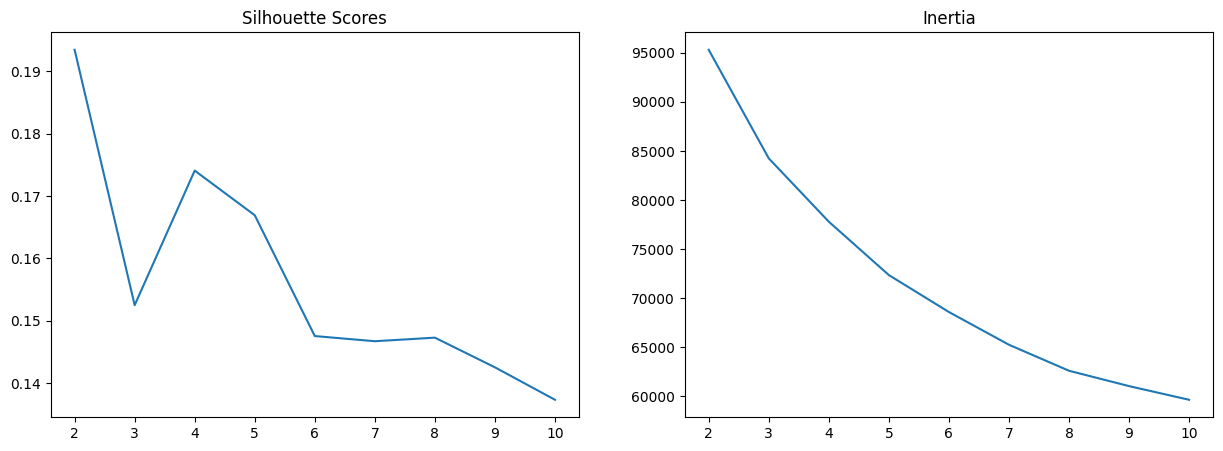

In [ ]:
# Iterate over a range of k clusters to find the optimal number of clusters
ks = range(2,11)
sils = []
inertias = []
for k in ks:
  kmeans = KMeans(n_clusters=k, n_init = 'auto', random_state=42)
  kmeans.fit(df_scaled)
  sils.append(silhouette_score(df_scaled, kmeans.labels_))
  inertias.append(kmeans.inertia_)

#plot inertias and silhouette scores for each number of clusters.
fig, axes = plt.subplots(1,2, figsize=(15,5))
axes[0].plot(ks, sils)
axes[0].set_title('Silhouette Scores')
axes[0].set_xticks(ks)
axes[1].plot(ks, inertias)
axes[1].set_title('Inertia')
axes[1].set_xticks(ks);

- The above line plot shows that the graph starts to level off at 3 clusters. there is an elbow on cluster 3 , but 5 clusters might be another suitable choice for a good number of clusters.

### Kmeans gouping

In [ ]:
kmeans = KMeans(n_clusters=5, n_init= 'auto', random_state=42)

kmeans.fit(df_scaled)


df['cluster'] = kmeans.labels_
df.head()

,SalePrice,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,DaylightBasement,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,BrickStone,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,Longitude,Latitude,cluster
0,400000,1590,0,0,0,3180,1590,1590,0,600,1,50,0,220,0,6,0,2,1,1965,-122.196399,47.336118,2
1,474250,1390,0,0,0,2200,810,810,0,0,1,0,0,340,0,4,1,0,1,1945,-122.361913,47.509874,2
2,667950,1010,0,1515,0,2525,0,0,0,400,0,167,0,0,0,4,1,0,2,2019,-122.156684,47.437557,4
3,659000,660,0,540,0,1820,620,620,0,0,1,0,0,100,0,3,1,0,2,2016,-122.370252,47.565146,0
4,656500,2310,0,0,0,2310,0,0,0,440,0,40,0,320,0,3,0,0,2,1967,-122.184194,47.730389,1


### Explanatory Analysis of KMeans Clusters


In [ ]:
cluster_groups = df.groupby('cluster', as_index=False).mean()
cluster_groups

,cluster,SalePrice,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,DaylightBasement,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,BrickStone,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,Longitude,Latitude
0,0,692397.763578,618.607029,1.405751,579.806709,1.613419,1560.701278,514.428115,359.268371,135.955272,13.460064,0.798722,30.693291,15.654952,291.321086,0.135783,2.840256,0.583067,0.960064,1.238019,2013.730032,-122.327118,47.609223
1,1,535317.779040,1200.018069,95.894682,66.293237,0.000000,1441.044399,357.881776,83.195663,28.440888,156.258647,0.058338,41.729479,7.542592,64.875065,4.958699,3.020134,0.213216,0.283428,1.093960,1947.282395,-122.284806,47.556710
2,2,715732.539740,1424.026012,30.565029,62.015896,0.000000,2338.044798,1253.809971,821.820809,237.625723,137.088873,0.812861,39.565029,5.724711,202.398121,8.155347,3.811416,0.384393,0.936416,1.300578,1963.019509,-122.253158,47.581926
3,3,726505.382239,526.884170,17.694981,543.776062,490.262548,1615.803089,103.976834,48.764479,50.424710,21.652510,0.135135,21.474903,17.181467,297.181467,1.544402,2.749035,0.463320,0.756757,1.301158,2016.710425,-122.340948,47.622970
4,4,870444.739069,1376.864598,30.846262,1395.805360,3.356841,2961.792666,218.581100,155.664316,29.390691,470.291961,0.086037,157.880113,5.218618,92.080395,0.641749,4.224260,0.671368,0.622003,2.056417,2003.297602,-122.197330,47.545050


- In order to remove sciantic notaion in sale price column it can be achived throw lambda function that formats each floating-point number with three decimal places.

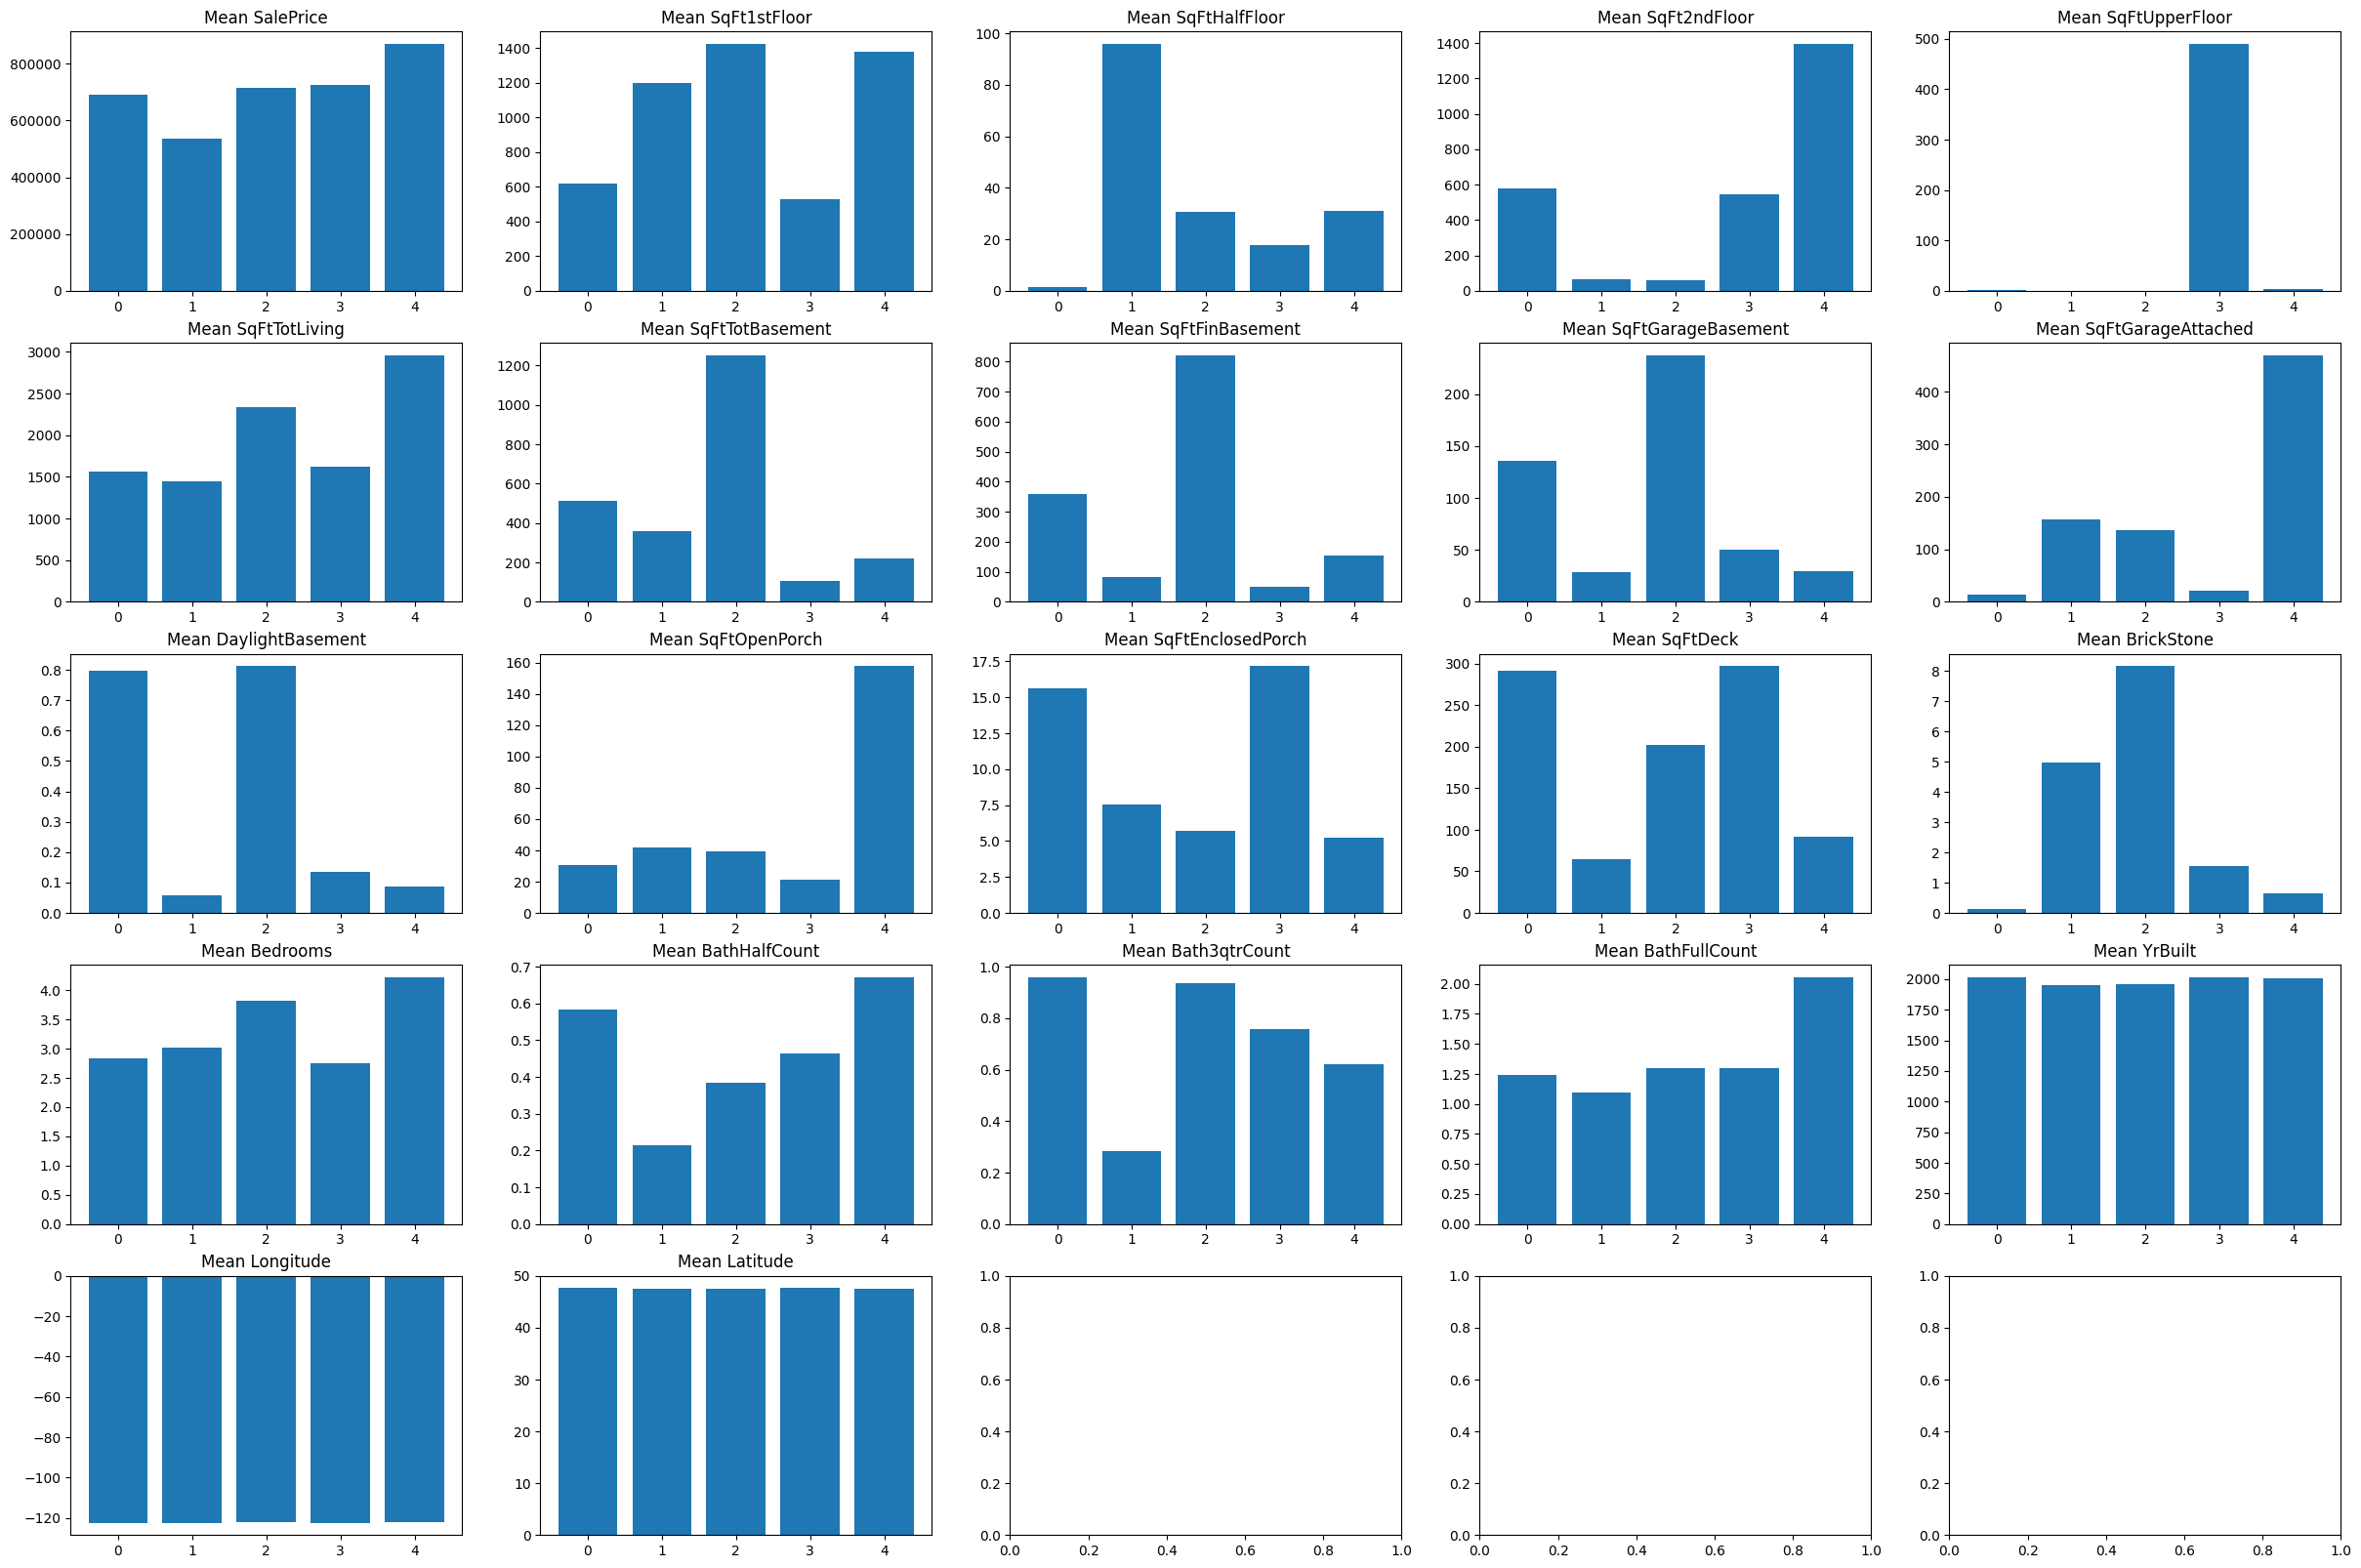

In [ ]:
# Visualize means
fig, axes = plt.subplots(5,5, figsize = (30, 20))
axes = axes.ravel()
for i, col in enumerate(cluster_groups.columns[1:]):
  axes[i].bar(cluster_groups['cluster'], cluster_groups[col])
  axes[i].set_title(f'Mean {col}')

**Cluster Analysis Report:**
  - Cluster 0: Cluster 0 represents lower-priced homes with moderate living space.

    - Average Sale Price: $692,398
    - Average Total Living Area: 1,561 sqft
    - Average Year Built: 2014

  - Cluster 1: Cluster 1 represents mid-priced homes with larger living space.

    - Average Sale Price: $535,318
    - Average Total Living Area: 1,441 sqft
    - Average Year Built: 1947

  - Cluster 2: Cluster 2 represents higher-priced homes with the largest living space.

    - Average Sale Price: $715,733
    - Average Total Living Area: 2,338 sqft
    - Average Year Built: 1963

  - Cluster 3: Cluster 3 represents moderately-priced homes with moderate living space.

    - Average Sale Price: $726,505
    - Average Total Living Area: 1,616 sqft
    - Average Year Built: 2017

  - Cluster 4: Cluster 4 represents higher-priced homes with large living space and modern features.

    - Average Sale Price: $870,445
    - Average Total Living Area: 2,962 sqft
    - Average Year Built: 2003

- **Important Differences between Clusters**: Sale Price vs. Total Living Area

These clusters provides the visualization of sale price vs total living area. These are graphs illustrating the comparison of clusters
 per pricing / living area, showing that generally a higher total living area is also related to a higher sales price

# **Part 2: Modeling Instructions**


## **Loading Data**

In [7]:
fpath_2='/content/drive/MyDrive/StudentFolders16wk24wk/CodingDojo/06-AdvancedML/Week21/Data/option_A_modeling_df - option_A_modeling_df.csv'
df_2=pd.read_csv(fpath_2)
print(df_2.info())
df_2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4937 entries, 0 to 4936
Columns: 171 entries, SalePrice to YearSold_2020
dtypes: float64(2), int64(169)
memory usage: 6.4 MB
None


,SalePrice,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,DaylightBasement,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,BrickStone,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,PcntComplete,Longitude,Latitude,Golf Course,Other Great Outdoors,Elementary School,General Entertainment,Park,Mexican Restaurant,Vietnamese Restaurant,Gas Station,Housing Development,Playground,Pool,Church,Dive Bar,Convenience Store,Middle School,Grocery Store,Brewery,Bar,Salon / Barbershop,Post Office,Beach,Lake,Medical Center,Sandwich Place,Nail Salon,Pizza Place,Moving Target,Building,Preschool,Library,Trail,Farm,Community Center,High School,Gym / Fitness Center,Bridge,Gym,Supermarket,School,Dance Studio,Athletics & Sports,Garden,Airport,Beer Bar,Dog Run,Pharmacy,Scenic Lookout,Bank,Fast Food Restaurant,Miscellaneous Shop,Pet Store,Doctor's Office,Pub,Coffee Shop,Food Truck,Hardware Store,Bus Stop,Field,Laundry Service,Dentist's Office,Bus Station,Auto Dealership,Veterinarian,Tennis Court,Chinese Restaurant,Furniture / Home Store,Bus Line,Café,Event Space,Italian Restaurant,Marijuana Dispensary,Office,Yoga Studio,Restaurant,Baseball Field,Discount Store,Physical Therapist,American Restaurant,Martial Arts Dojo,Spa,Storage Facility,Daycare,General Travel,Burger Joint,Pet Service,Thai Restaurant,Chiropractor,Bakery,Mobile Phone Shop,Ice Cream Shop,Automotive Shop,Assisted Living,Health & Beauty Service,Fried Chicken Joint,Taco Place,Video Store,Financial or Legal Service,Massage Studio,Asian Restaurant,Insurance Office,Japanese Restaurant,ATM,Locksmith,Shipping Store,BldgGrade_4,BldgGrade_5,BldgGrade_6,BldgGrade_7,BldgGrade_8,BldgGrade_9,BldgGrade_10,BldgGrade_11,BldgGrade_12,FinBasementGrade_3,FinBasementGrade_4,FinBasementGrade_5,FinBasementGrade_6,FinBasementGrade_7,FinBasementGrade_8,FinBasementGrade_9,FinBasementGrade_10,HeatSystem_1,HeatSystem_2,HeatSystem_3,HeatSystem_4,HeatSystem_5,HeatSystem_6,HeatSystem_7,HeatSystem_8,Condition_2,Condition_3,Condition_4,Condition_5,MonthSold_02,MonthSold_03,MonthSold_04,MonthSold_05,MonthSold_06,MonthSold_07,MonthSold_08,MonthSold_09,MonthSold_10,MonthSold_11,MonthSold_12,YearSold_2017,YearSold_2018,YearSold_2019,YearSold_2020
0,400000,1590,0,0,0,3180,1590,1590,0,600,1,50,0,220,0,6,0,2,1,1965,0,-122.196399,47.336118,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,474250,1390,0,0,0,2200,810,810,0,0,1,0,0,340,0,4,1,0,1,1945,0,-122.361913,47.509874,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,667950,1010,0,1515,0,2525,0,0,0,400,0,167,0,0,0,4,1,0,2,2019,0,-122.156684,47.437557,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,659000,660,0,540,0,1820,620,620,0,0,1,0,0,100,0,3,1,0,2,2016,0,-122.370252,47.565146,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,656500,2310,0,0,0,2310,0,0,0,440,0,40,0,320,0,3,0,0,2,1967,0,-122.184194,47.730389,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


**Data set Shape**
  - **Rows:** 4937
  - **Columns:** 171


## **X , y and train test split Defination**

In [8]:
X = df_2.drop(columns = ['SalePrice'])
y = df_2['SalePrice']
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

- Scaling The Numaricl Data since all of our data are numurical.

In [9]:
scaler = StandardScaler()

X_train_tf = scaler.fit_transform(X_train)
X_test_tf = scaler.transform(X_test)

## **PCA implementation**

In [10]:
# Choosing 0.95 variance to include the 95% most important features
pca = PCA(n_components=0.95)


In [11]:
# Apply PCA on imputed training and testing datasets
X_train_pca = pca.fit_transform(X_train_tf)
X_test_pca = pca.transform(X_test_tf)

In [12]:
X_train_pca.head(3)

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16,pca17,pca18,pca19,pca20,pca21,pca22,pca23,pca24,pca25,pca26,pca27,pca28,pca29,pca30,pca31,pca32,pca33,pca34,pca35,pca36,pca37,pca38,pca39,pca40,pca41,pca42,pca43,pca44,pca45,pca46,pca47,pca48,pca49,pca50,pca51,pca52,pca53,pca54,pca55,pca56,pca57,pca58,pca59,pca60,pca61,pca62,pca63,pca64,pca65,pca66,pca67,pca68,pca69,pca70,pca71,pca72,pca73,pca74,pca75,pca76,pca77,pca78,pca79,pca80,pca81,pca82,pca83,pca84,pca85,pca86,pca87,pca88,pca89,pca90,pca91,pca92,pca93,pca94,pca95,pca96,pca97,pca98,pca99,pca100,pca101,pca102,pca103,pca104,pca105,pca106,pca107,pca108,pca109,pca110,pca111,pca112,pca113,pca114,pca115,pca116,pca117,pca118,pca119,pca120,pca121,pca122,pca123,pca124,pca125,pca126,pca127,pca128,pca129,pca130,pca131,pca132,pca133,pca134,pca135,pca136,pca137,pca138,pca139,pca140,pca141,pca142
4093,-1.259311,0.185539,0.241762,2.999282,-0.698471,-1.096047,0.735827,-0.320556,2.025664,0.637873,1.937996,-0.468806,-1.059051,-1.188986,0.670233,0.943570,-0.756248,0.027163,0.398962,-1.557886,-0.050372,-0.744238,0.535130,0.246884,0.193823,-1.344476,-0.800533,-0.429129,-0.215659,0.638759,-0.002908,0.234060,0.124838,1.040072,-0.767658,-1.013815,-1.394532,-0.767372,-2.329179,0.053864,-1.173295,-0.825077,-0.822492,-0.002263,0.199401,-0.521677,-0.905588,-0.779533,-1.678557,1.624876,0.402693,0.224578,-0.287611,0.143541,0.097155,-1.160374,-0.663540,-0.195303,1.278957,0.226624,1.673702,-0.215992,-0.774488,-0.005179,-0.088906,0.293349,1.131880,1.975186,-0.082669,-1.872933,1.301399,-0.549807,-1.011883,0.452681,-0.328368,0.530531,-2.002963,-0.589712,0.048970,1.368065,1.253365,-0.178387,1.043015,-0.023893,0.381049,0.989205,-0.216983,1.618252,0.562629,-2.710371,1.059874,-0.658797,-0.255095,0.767835,0.173351,0.303016,0.190368,1.078518,0.343303,-1.539110,-0.223596,-0.544869,-1.703031,0.173339,0.785937,-0.781354,1.287112,0.015728,0.044982,0.065395,1.718572,1.882549,-1.054357,1.351228,0.216851,2.320756,-0.044278,-0.148209,1.161307,-1.521170,0.181809,0.205295,-0.216931,-0.457055,-0.931006,-0.063288,0.761869,-0.757879,0.235370,1.641573,-0.335417,0.122323,-0.571322,-0.839005,-0.552546,0.218168,-0.387615,-0.389168,0.288335,-1.106660,0.573580,0.094655,0.305361
2585,-3.487334,1.379498,-1.701584,0.442732,0.759616,0.668164,-1.435951,-0.059520,-2.610046,-0.918234,0.041124,-1.081404,0.033720,-3.448966,-0.297216,0.708416,0.345576,-0.394857,-1.149844,-0.268599,0.555399,-0.665597,-0.514737,0.350416,1.077737,1.596356,-1.226352,1.846635,-1.456875,2.538042,-1.700690,1.253734,1.923233,3.413419,-2.332841,-1.108733,1.607332,-0.271236,-0.254087,-0.183309,1.352714,1.823606,1.499448,0.892161,1.670334,2.653412,-0.843081,-0.782829,-0.001619,-0.054896,-0.666931,2.075937,-0.281796,-0.613337,0.786318,2.477957,0.334689,0.037796,0.145843,0.074780,1.914905,-1.106294,-1.045574,2.335194,0.562363,1.404065,-0.353674,-1.494948,-0.293933,-0.274188,-0.119405,-2.114757,0.594792,-0.439018,0.703428,-1.081007,-0.355719,-1.889733,-0.847774,2.130622,-1.069152,-0.146546,-0.062105,-2.755885,-2.987092,1.114915,0.206677,-3.139479,1.525125,-0.264703,-0.909240,1.662428,1.509444,2.418528,0.635735,-2.722858,-1.385423,-2.858372,-0.697152,2.324182,-1.040407,-0.963772,-0.361745,-0.424004,1.137571,0.961317,0.822181,-0.675513,-1.203855,0.723614,-0.162952,-0.085749,-0.053741,0.750952,0.137825,1.844498,-0.037242,-1.280260,-0.250666,-1.173862,-1.903547,-0.291517,-0.659982,2.259744,0.304371,-0.480137,-0.462481,-1.640160,0.931814,-0.849125,0.744401,0.219298,1.298120,-0.654051,-0.756236,-0.578973,1.891422,-0.808812,-0.105471,1.175554,-0.040867,-0.633861,1.361386
4189,-2.314158,-0.779577,-0.160359,-0.416086,1.584340,-1.849926,0.295963,0.794933,-0.149718,-0.200277,-0.309620,0.638069,-1.353585,0.673307,-2.032643,1.152544,2.379277,1.184915,-0.349957,-0.390099,0.124687,-0.154020,0.087171,-0.119345,-0.598249,1.899153,0.083928,1.016232,-0.665136,-2.743439,1.095096,0.378711,2.029737,1.236147,1.412885,-0.892181,1.327628,0.510723,0.61139

## **Deep learning models**

- Plot history predinfed funcation

In [13]:
def plot_history(history, figsize=(6,12), marker='o'):

    # Get list of metrics from history
    metrics = [c for c in history.history if not c.startswith('val_')]

    ## Separate row for each metric
    fig, axes = plt.subplots(nrows=len(metrics),figsize=figsize)

    # For each metric
    for i, metric_name in enumerate(metrics):

        # Get the axis for the current metric
        ax = axes[i]

        # Get metric from history.history
        metric_values = history.history[metric_name]
        # Get epochs from history
        epochs = history.epoch

        # Plot the training metric
        ax.plot(epochs, metric_values, label=metric_name, marker=marker)

        ## Check if val_{metric} exists. if so, plot:
        val_metric_name = f"val_{metric_name}"
        if val_metric_name in history.history:
            # Get validation values and plot
            metric_values = history.history[val_metric_name]
            ax.plot(epochs,metric_values,label=val_metric_name, marker=marker)

        # Final subplot adjustments
        ax.legend()
        ax.set_title(metric_name)
    fig.tight_layout()

    return fig, axes

In [14]:
# input shape defination
input_shape = X_train_pca.shape[1]
input_shape

143

##  **Model 1**

- In the first model , we will use the following as a first step in building the model:
  - Inpuer layer: 1
  - hidden layers: 2
  - Ealry stopping = 10.
  - Dropout = 20%.
  - Epoch: 50.


In [15]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [16]:
# Build regression model within function
def build_model():
    # Instantiate Model
    model = Sequential()

    # First hidden layer
    model.add(Dense(143,
                input_dim =input_shape,
                activation = 'relu'))

    model.add(Dense(100,
                activation = 'relu'))

    model.add(Dense(50,
                activation = 'relu'))

    model.add(Dropout(.2))
    model.add(Dense(1, activation = 'linear'))

    # Compile Model
    model.compile(loss = 'mse', optimizer = 'nadam',
             metrics=[metrics.MeanAbsoluteError(), metrics.RootMeanSquaredError()])


    return model

In [17]:
# Call our build function to build model
model_1 = build_model()

# Get model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 143)               20592     
                                                                 
 dense_1 (Dense)             (None, 100)               14400     
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 40093 (156.61 KB)
Trainable params: 40093 (156.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
history_1 = model_1.fit(X_train_pca, y_train,
                    validation_split=.2,
                      epochs=50,
                   verbose=1, callbacks = [early_stopping])

Epoch 1/50
93/93 [==============================] - 3s 6ms/step - loss: 525764788224.0000 - mean_absolute_error: 662985.6875 - root_mean_squared_error: 725096.3750 - val_loss: 553019768832.0000 - val_mean_absolute_error: 672328.0625 - val_root_mean_squared_error: 743653.0000
Epoch 2/50
93/93 [==============================] - 0s 3ms/step - loss: 517267652608.0000 - mean_absolute_error: 657333.1875 - root_mean_squared_error: 719213.1875 - val_loss: 530934530048.0000 - val_mean_absolute_error: 658048.5000 - val_root_mean_squared_error: 728652.5625
Epoch 3/50
93/93 [==============================] - 0s 3ms/step - loss: 459401003008.0000 - mean_absolute_error: 618966.1875 - root_mean_squared_error: 677791.2500 - val_loss: 429527564288.0000 - val_mean_absolute_error: 590548.5625 - val_root_mean_squared_error: 655383.5000
Epoch 4/50
93/93 [==============================] - 0s 3ms/step - loss: 298526998528.0000 - mean_absolute_error: 495602.6562 - root_mean_squared_error: 546376.2500 - val_lo

- The training of the model completed all the 50 epoch that were giving

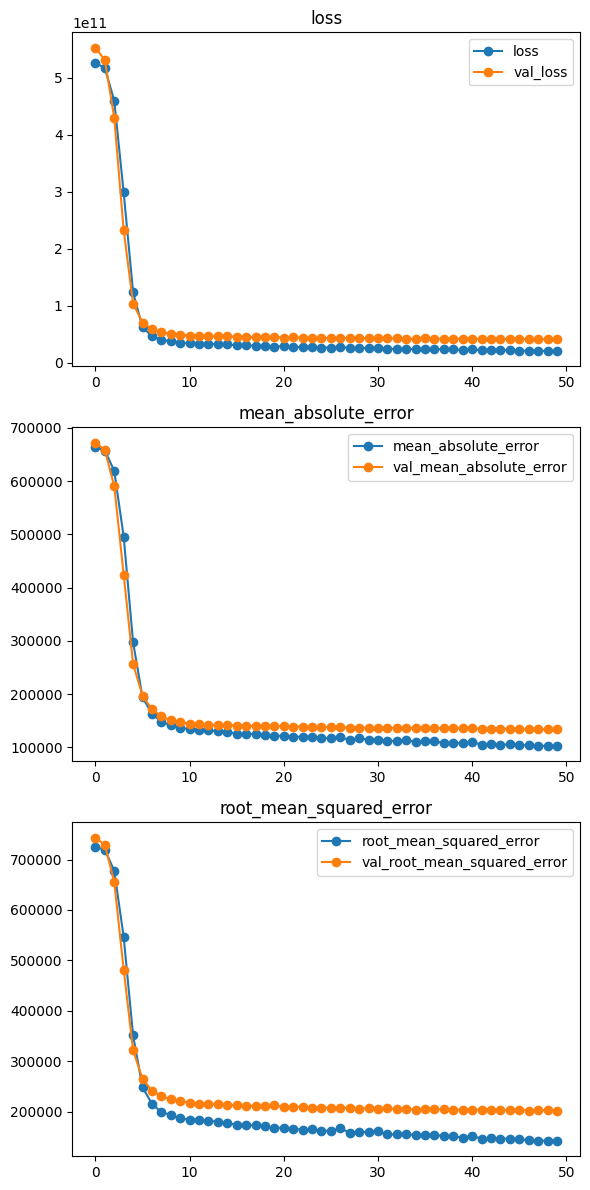

In [19]:
# plot learning
plot_history(history_1);

- The plot indicated that the model is still learning.:
there is a room to fix it in the next models

In [20]:
# evaluate model

y_pred = model_1.predict(X_test_pca)

print('-'*60)
print('Testing Data')
print('-'*60)
print(f'final RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'final MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'final R2: {r2_score(y_test, y_pred)}')



# evaluate model

y_train_pred_1 = model_1.predict(X_train_pca)

print('-'*60)
print('Training Data')
print('-'*60)
print('\n')
print(f'final RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred_1))}')
print(f'final MAE: {mean_absolute_error(y_train, y_train_pred_1)}')
print(f'final R2: {r2_score(y_train, y_train_pred_1)}')

39/39 [==============================] - 0s 1ms/step
------------------------------------------------------------
Testing Data
------------------------------------------------------------
final RMSE: 197709.11758440125
final MAE: 138280.34395242916
final R2: 0.5527375793453517
116/116 [==============================] - 0s 2ms/step
------------------------------------------------------------
Training Data
------------------------------------------------------------


final RMSE: 141532.08915072738
final MAE: 95575.71231344543
final R2: 0.7754893830725295


- Testing Data
  - R2: Explains that 55.27% of the variance in the target variable is explained by the model.
  - MAE: The model tends to make an error of around $138,280 in predicting home selling prices.
  
  - RMSE: The model predictions make an error from the actual selling prices by around $197,709.


- Training Data
  - R2: Explains that 77.54% of the variance in the target variable is explained by the model.
  - MAE: The model tends to make an error of around $95,575 in predicting home selling prices.

  - RMSE: The model predictions make an error from the actual selling prices by around $141,532.

## **Model 2**

- In model 2 , we will increase number of epochs,and get a sense of when the model loss and metrics be satisfied

- In the seconed model , we will use the following as a first step in building the model:
  - Inpuer layer: 1
  - hidden layers: 1
  - Ealry stopping = 10.
  - Dropout = 20%.
  - Epoch: 100.


In [21]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [22]:
# Build regression model within function
def build_model():
    # Instantiate Model
    model = Sequential()

    # First hidden layer
    model.add(Dense(143,
                input_dim =input_shape,
                activation = 'relu'))

    model.add(Dense(80,
                activation = 'relu'))

    model.add(Dense(40,
                activation = 'relu'))


    model.add(Dropout(.2))
    model.add(Dense(1, activation = 'linear'))

    # Compile Model
    model.compile(loss = 'mse', optimizer = 'nadam',
             metrics=[metrics.MeanAbsoluteError(), metrics.RootMeanSquaredError()])
    return model

In [23]:
# Call our build function to build model
model_2 = build_model()

# Get model summary
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 143)               20592     
                                                                 
 dense_5 (Dense)             (None, 80)                11520     
                                                                 
 dense_6 (Dense)             (None, 40)                3240      
                                                                 
 dropout_1 (Dropout)         (None, 40)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 41        
                                                                 
Total params: 35393 (138.25 KB)
Trainable params: 35393 (138.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
history_2 = model_2.fit(X_train_pca, y_train,
                    validation_split=.2,
                      epochs=100,
                   verbose=1, callbacks = [early_stopping])

Epoch 1/100
93/93 [==============================] - 2s 6ms/step - loss: 525793034240.0000 - mean_absolute_error: 663008.6875 - root_mean_squared_error: 725115.8750 - val_loss: 553175678976.0000 - val_mean_absolute_error: 672430.0000 - val_root_mean_squared_error: 743757.8125
Epoch 2/100
93/93 [==============================] - 0s 4ms/step - loss: 518447497216.0000 - mean_absolute_error: 658085.5000 - root_mean_squared_error: 720033.0000 - val_loss: 534466134016.0000 - val_mean_absolute_error: 660248.1250 - val_root_mean_squared_error: 731071.9375
Epoch 3/100
93/93 [==============================] - 0s 5ms/step - loss: 469681176576.0000 - mean_absolute_error: 625589.4375 - root_mean_squared_error: 685332.8750 - val_loss: 449044152320.0000 - val_mean_absolute_error: 603704.6250 - val_root_mean_squared_error: 670107.5625
Epoch 4/100
93/93 [==============================] - 0s 5ms/step - loss: 329783214080.0000 - mean_absolute_error: 521430.1250 - root_mean_squared_error: 574267.5625 - va

- The training of the model completed all the givin 100 epochs.

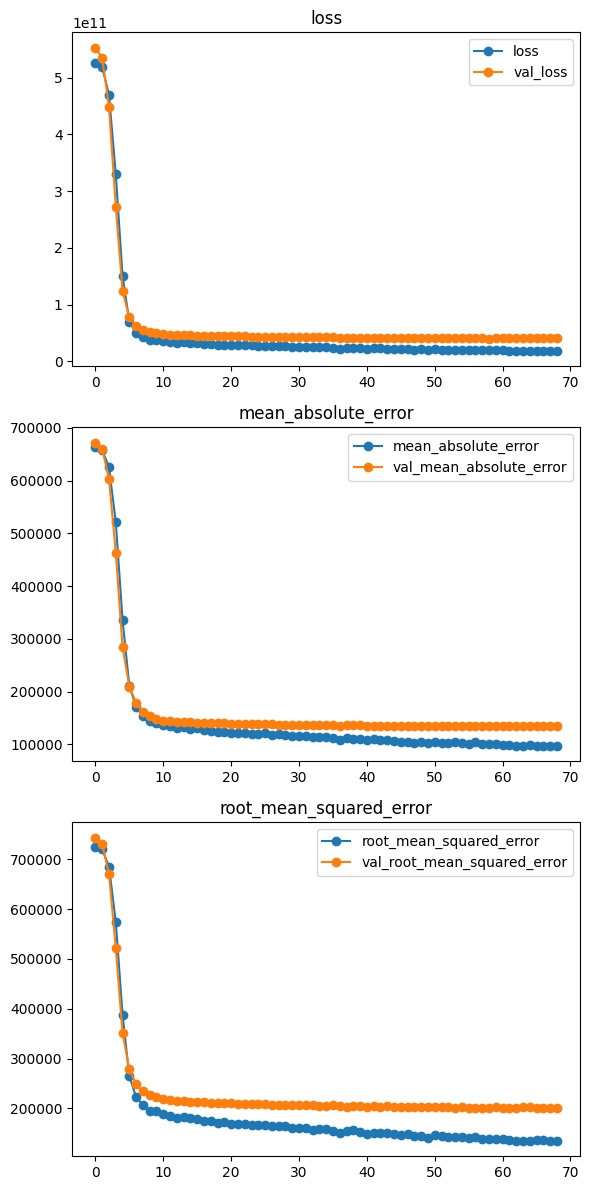

In [25]:
# plot learning
plot_history(history_2);

In [26]:
# evaluate model

y_pred = model_2.predict(X_test_pca)

print('-'*60)
print('Testing Data for Model 2')
print('-'*60)
print('\n')

print(f'final RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'final MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'final R2: {r2_score(y_test, y_pred)}')


# evaluate model

y_train_pred_2 = model_2.predict(X_train_pca)

print('-'*60)
print('Training Data for Model 2')
print('-'*60)
print('\n')

print(f'final RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred_2))}')
print(f'final MAE: {mean_absolute_error(y_train, y_train_pred_2)}')
print(f'final R2: {r2_score(y_train, y_train_pred_2)}')



39/39 [==============================] - 0s 1ms/step
------------------------------------------------------------
Testing Data for Model 2
------------------------------------------------------------


final RMSE: 197481.90821819022
final MAE: 137962.4053770243
final R2: 0.553764985867812
116/116 [==============================] - 0s 1ms/step
------------------------------------------------------------
Training Data for Model 2
------------------------------------------------------------


final RMSE: 134860.65379957037
final MAE: 89514.65941973933
final R2: 0.7961561702111558


- Testing Data for Model 2
  - R2: Explains that 55.37% of the variance in the target variable is explained by the model.

  - MAE: The model tends to make an error of around $137,962 in predicting home selling prices.

  - RMSE: The model predictions make an error from the actual selling prices by around $197,481.

- Training Data for Model 2
  - R2: Explains that 79.6% of the variance in the target variable is explained by the model.
  - MAE: The model tends to make an error of around $89,514 in predicting home selling prices.
  
  - RMSE: The model predictions make an error from the actual selling prices by around $134,860.

## **Model 3**

- In this model, in this model will try tuning using l1/l2 regularizer to decrase overfiting from model 2.

- In the third model , we will use the following as a first step in building the model:
  - Inpuer layer: 1
  - hidden layers: 2 in order to allows the model to learn more complex patterns.
  
  - Ealry stopping = 20 in order to helps the model to prevent premature stopping by giving the model more time to improve

  - Dropout = 20%.
  - Epoch: 200.


In [49]:
 early_stopping = EarlyStopping(monitor='val_loss', patience=20)

In [48]:
# Build regression model within function
def build_model():
    # Instantiate Model
    model = Sequential()

    # First hidden layer
    model.add(Dense(180,
                input_dim =input_shape,
                activation = 'relu'))



    model.add(Dense(150,
                activation = 'relu' ,kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)))

    model.add(Dense(85,
                activation = 'relu'))

    model.add(Dense(60,
                activation = 'relu'))

    model.add(Dense(30,
                activation = 'relu' ,kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)))


    model.add(Dense(10,
                activation = 'relu'))

    model.add(Dropout(.2))
    model.add(Dense(1, activation = 'linear'))

    # Compile Model
    model.compile(loss = 'mse', optimizer = 'nadam',
             metrics=[metrics.MeanAbsoluteError(), metrics.RootMeanSquaredError()])


    return model

In [50]:
# Call our build function to build model
model_3 = build_model()

# Get model summary
model_3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 180)               25920     
                                                                 
 dense_35 (Dense)            (None, 150)               27150     
                                                                 
 dense_36 (Dense)            (None, 85)                12835     
                                                                 
 dense_37 (Dense)            (None, 60)                5160      
                                                                 
 dense_38 (Dense)            (None, 30)                1830      
                                                                 
 dense_39 (Dense)            (None, 10)                310       
                                                                 
 dropout_14 (Dropout)        (None, 10)               

In [51]:
history_3 = model_3.fit(X_train_pca, y_train,
                    validation_split=.2,
                      epochs=200,
                   verbose=1, callbacks = [early_stopping])

Epoch 1/200
93/93 [==============================] - 4s 7ms/step - loss: 506098548736.0000 - mean_absolute_error: 648364.6250 - root_mean_squared_error: 711406.0625 - val_loss: 395484954624.0000 - val_mean_absolute_error: 553722.5000 - val_root_mean_squared_error: 628875.9375
Epoch 2/200
93/93 [==============================] - 0s 4ms/step - loss: 117011628032.0000 - mean_absolute_error: 257299.2969 - root_mean_squared_error: 342069.6250 - val_loss: 56189018112.0000 - val_mean_absolute_error: 158903.4219 - val_root_mean_squared_error: 237042.2344
Epoch 3/200
93/93 [==============================] - 0s 4ms/step - loss: 69708292096.0000 - mean_absolute_error: 195285.8750 - root_mean_squared_error: 264023.2812 - val_loss: 51156996096.0000 - val_mean_absolute_error: 151470.0156 - val_root_mean_squared_error: 226179.1250
Epoch 4/200
93/93 [==============================] - 0s 4ms/step - loss: 59089813504.0000 - mean_absolute_error: 180180.4219 - root_mean_squared_error: 243083.9688 - val_lo

- The training of the model in realtion to val loss, was satisfied at at 47 epochs for our model's specifications



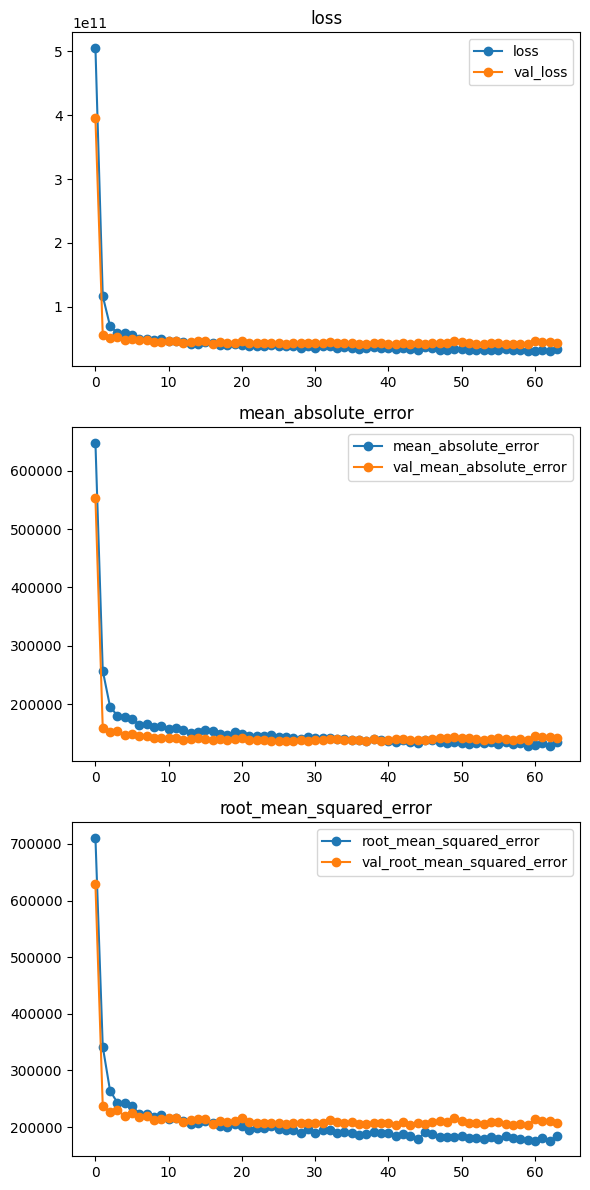

In [52]:
# plot learning
plot_history(history_3);

- there is a significant improvement after using l1/l2 regularizer , and overfitting issue handeld better and the stabilization of loss has been achieved.

-

In [53]:
# evaluate model

y_pred_3 = model_3.predict(X_test_pca)


print('-'*60)
print('Testing Data for model 3')
print('-'*60)
print('\n')
print(f'final RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_3))}')
print(f'final MAE: {mean_absolute_error(y_test, y_pred_3)}')
print(f'final R2: {r2_score(y_test, y_pred_3)}')



# evaluate model

y_train_pred_3 = model_3.predict(X_train_pca)

print('-'*60)
print('Training Data for model 3')
print('-'*60)
print('\n')

print(f'final RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred_3))}')
print(f'final MAE: {mean_absolute_error(y_train, y_train_pred_3)}')
print(f'final R2: {r2_score(y_train, y_train_pred_3)}')


39/39 [==============================] - 0s 1ms/step
------------------------------------------------------------
Testing Data for model 3
------------------------------------------------------------


final RMSE: 204872.2001815341
final MAE: 143596.09984817813
final R2: 0.5197414809116124
116/116 [==============================] - 0s 1ms/step
------------------------------------------------------------
Training Data for model 3
------------------------------------------------------------


final RMSE: 117365.87075486583
final MAE: 74162.22956763236
final R2: 0.8456130103727069


- Testing Data for Model 3
  - R2: Explains that 51.97% of the variance in the target variable is explained by the model.

  - MAE: The model tends to make an error of around $143,596 in predicting home selling prices.

  - RMSE: The model predictions make an error from the actual selling prices by around $204,872.

- Training Data for Model 3
  - R2: Explains that 84.56% of the variance in the target variable is explained by the model.

  - MAE: The model tends to make an error of around $74,162 in predicting home selling prices.

  - RMSE: The model predictions make an error from the actual selling prices by around $117,365.

## **Model 4**

- In this model, I will try decreasing hidden layers in order to reduce complexity and fix the overfitting issue in model 3.


- we will use the following as a first step in building the model:

Inpuer layer: 1

hidden layers: 2

Ealry stopping = 8

Dropout = 20%.

Epoch: 60.

In [55]:
early_stopping = EarlyStopping(monitor='val_loss', patience=8)

In [62]:
# Build regression model within function
def build_model():
    # Instantiate Model
    model = Sequential()

    # First hidden layer
    model.add(Dense(50,
                input_dim =input_shape,
                activation = 'relu'))

    model.add(Dense(30,
                activation = 'relu',kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)))

    model.add(Dense(10,
                activation = 'relu'))


    model.add(Dropout(.2))
    model.add(Dense(1, activation = 'linear'))

    # Compile Model
    model.compile(loss = 'mse', optimizer = 'nadam',
             metrics=[metrics.MeanAbsoluteError(), metrics.RootMeanSquaredError()])
    return model

In [63]:
# Call our build function to build model
model_2_a = build_model()

# Get model summary
model_2_a.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 50)                7200      
                                                                 
 dense_46 (Dense)            (None, 30)                1530      
                                                                 
 dense_47 (Dense)            (None, 10)                310       
                                                                 
 dropout_16 (Dropout)        (None, 10)                0         
                                                                 
 dense_48 (Dense)            (None, 1)                 11        
                                                                 
Total params: 9051 (35.36 KB)
Trainable params: 9051 (35.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [64]:
history_2_a = model_2_a.fit(X_train_pca, y_train,
                    validation_split=.2,
                      epochs=60,
                   verbose=1, callbacks = [early_stopping])

Epoch 1/60
93/93 [==============================] - 2s 6ms/step - loss: 526025097216.0000 - mean_absolute_error: 663171.3125 - root_mean_squared_error: 725275.8750 - val_loss: 554309189632.0000 - val_mean_absolute_error: 673211.1875 - val_root_mean_squared_error: 744519.4375
Epoch 2/60
93/93 [==============================] - 0s 3ms/step - loss: 525682671616.0000 - mean_absolute_error: 662939.5625 - root_mean_squared_error: 725039.7500 - val_loss: 553497657344.0000 - val_mean_absolute_error: 672677.3750 - val_root_mean_squared_error: 743974.2500
Epoch 3/60
93/93 [==============================] - 0s 3ms/step - loss: 523673796608.0000 - mean_absolute_error: 661646.9375 - root_mean_squared_error: 723653.0625 - val_loss: 549998755840.0000 - val_mean_absolute_error: 670480.4375 - val_root_mean_squared_error: 741619.0000
Epoch 4/60
93/93 [==============================] - 0s 3ms/step - loss: 517179211776.0000 - mean_absolute_error: 657588.8125 - root_mean_squared_error: 719151.7500 - val_lo

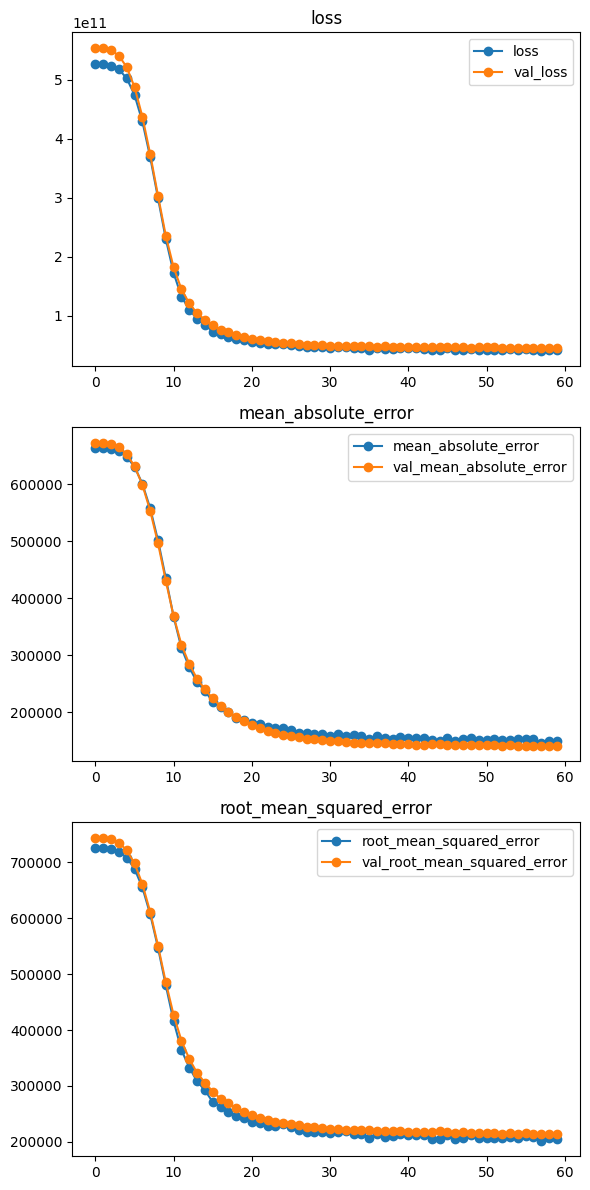

In [65]:
# plot learning
plot_history(history_2_a);

In [67]:
# evaluate model

y_pred_2_a = model_2_a.predict(X_test_pca)


print('-'*60)
print('Testing Data for model 4')
print('-'*60)
print('\n')
print(f'final RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_2_a))}')
print(f'final MAE: {mean_absolute_error(y_test, y_pred_2_a)}')
print(f'final R2: {r2_score(y_test, y_pred_2_a)}')



# evaluate model

y_train_pred_2_a = model_2_a.predict(X_train_pca)

print('-'*60)
print('Training Data for Model 4')
print('-'*60)
print('\n')

print(f'final RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred_2_a))}')
print(f'final MAE: {mean_absolute_error(y_train, y_train_pred_2_a)}')
print(f'final R2: {r2_score(y_train, y_train_pred_2_a)}')


39/39 [==============================] - 0s 2ms/step
------------------------------------------------------------
Testing Data for model 4
------------------------------------------------------------


final RMSE: 206072.88309302882
final MAE: 144085.67935222673
final R2: 0.5140957375468854
116/116 [==============================] - 0s 2ms/step
------------------------------------------------------------
Training Data for Model 4
------------------------------------------------------------


final RMSE: 169018.05935343012
final MAE: 115380.41488975554
final R2: 0.6798206855716479


## **Comparing models**

- **Model 4 stands out as the best choice:**

    - Model 4 achieves an RMSE of 206,072.88 on the testing dataset, indicating its predictions are relatively close to the actual home selling prices on average..

    - With a low validation (testing) loss the model shows effective handling of the predictive task, minimizing the overall error in forecasting.

- **Overfitting Consideration:**

    - Model 4 Performance: Model 4 shows balanced performance between training and testing datasets, reflected in its consistent metrics across both sets.



